In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
from pprint import pprint

In [55]:
lego_file = ("project_1/Dataset/lego_no_review_df.csv")

In [46]:
lego_df = pd.read_csv("project_1/Dataset/lego_no_review_df.csv")
lego_df.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_date,year
0,0,US,52187079,R22E1FW4RGFOC5,B00EXJM3P4,923528669,LEGO The Hobbit Dol Guldur Battle 79014,5,0,0,N,Y,LOTR + Lego = nirvana....,16452,2015
1,1,US,38801121,RSKHR5CR97VFJ,B0094J117O,38301932,LEGO® CITY® Museum Break-in & Police Unit w/ S...,5,0,0,N,Y,FUN,16086,2014
2,2,US,17257015,R12HDWC8E4AM74,B00BG5FYY0,702261848,LEGO Hero Factory 44012 EVO Action Figure Playset,4,1,2,N,Y,ok,16086,2014
3,3,US,14537742,R1JH6KW5DMZW5O,B00A852QIG,377101347,LEGO DUPLO My First Construction Site 10518,5,0,0,N,Y,Five Stars,16452,2015
4,4,US,14508692,R2I2XNCOQVZHYS,B00A8O87DA,912541874,LEGO LEGO Hero Factory BREEZ 44006,5,0,0,N,Y,Wonderful,16086,2014


In [47]:
lego_df[["product_title", "star_rating"]]
lego_stats1 = lego_df[lego_df['star_rating'] < 2]
lego_stats1

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_date,year
14,14,US,35052078,R1H0LKHOLVCD1M,B0042HOTYA,884018467,LEGO Road Construction Building Set 5930,1,0,0,N,Y,Way overpaid for this.,16086,2014
59,59,US,41957438,R3QERURB8ITA7X,B00CGG5FEM,195669058,LEGO Minecraft 21102,1,0,0,N,Y,One Star,16426,2014
62,62,US,33517532,RS7OORUYSQMHS,B001TD5KZ2,675127038,"LEGOVille 16"" Pull-String Pinata Party Supplies",1,1,1,N,Y,Should have skipped the pinata altogether,15027,2011
80,80,US,23145563,RR25AIV3KH8YJ,B00KCQMD84,563723063,LEGO Marvel Super Heroes Exclusive Set #30302 ...,1,0,2,N,Y,00 for 3 Lego items and was VERY disappointed....,16427,2014
164,164,US,44223241,R36UDC62XGAVE0,B00BR32BP6,286502481,LEGO® Minecraft Block Minifigures - Steve and ...,1,4,11,N,Y,Too small,15803,2013
166,166,US,39478054,R2XMA1H45U1KTP,B002L6I9Z4,930146661,LEGO 3MP Digital Camera,1,0,0,N,Y,Not As Advertised,15803,2013
168,168,US,39478054,R2XMA1H45U1KTP,B002L6I9Z4,930146661,LEGO 3MP Digital Camera,1,0,0,N,Y,Not As Advertised,15803,2013
286,286,US,50941193,R3E3EYOU6BLGTU,B008WCDZ3C,669463923,LEGO Super Heroes 30161 Batmobile Bagged Set,1,7,12,N,Y,Wish I'd read the reviews!,15849,2013
372,372,US,46247489,R2LT3NERPUNXY5,B00C8526SY,375562307,LEGO Superheroes 76002 Superman Metropolis Sho...,1,0,0,N,Y,One Star,16274,2014
422,422,US,26865270,R26VZ0GD9AFL7B,B001US29I2,65624900,LEGO Star Wars Set #8038 Clone Wars The Battle...,1,30,46,N,N,This design is embarrassing.,14524,2009


In [56]:
reduced_df = lego_stats1[["product_title", "star_rating", "year"]]
reduced_df.head()

,product_title,star_rating,year
14,LEGO Road Construction Building Set 5930,1,2014
59,LEGO Minecraft 21102,1,2014
62,"LEGOVille 16"" Pull-String Pinata Party Supplies",1,2011
80,LEGO Marvel Super Heroes Exclusive Set #30302 ...,1,2014
164,LEGO® Minecraft Block Minifigures - Steve and ...,1,2013


In [57]:
reduced_df1 = reduced_df.loc[reduced_df['year']>2012]

In [58]:
reduced_df1.star_rating.unique()

array([1], dtype=int64)

In [74]:
star_rate1 = reduced_df1.groupby('year').sum()

In [75]:
star_rate1.head()

,star_rating
year,
2013,851
2014,1273
2015,868


In [76]:
star_rate1 ['star_rating']

year
2013     851
2014    1273
2015     868
Name: star_rating, dtype: int64

In [60]:
lego_df[["product_title", "star_rating"]]
lego_stats2 = lego_df[lego_df['star_rating'] > 4]
lego_stats2

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_date,year
0,0,US,52187079,R22E1FW4RGFOC5,B00EXJM3P4,923528669,LEGO The Hobbit Dol Guldur Battle 79014,5,0,0,N,Y,LOTR + Lego = nirvana....,16452,2015
1,1,US,38801121,RSKHR5CR97VFJ,B0094J117O,38301932,LEGO® CITY® Museum Break-in & Police Unit w/ S...,5,0,0,N,Y,FUN,16086,2014
3,3,US,14537742,R1JH6KW5DMZW5O,B00A852QIG,377101347,LEGO DUPLO My First Construction Site 10518,5,0,0,N,Y,Five Stars,16452,2015
4,4,US,14508692,R2I2XNCOQVZHYS,B00A8O87DA,912541874,LEGO LEGO Hero Factory BREEZ 44006,5,0,0,N,Y,Wonderful,16086,2014
6,6,US,27746273,R263H8PX7OH897,B00J4S41AY,766573744,LEGO DUPLO Deluxe Box of fun 10580 Preschool C...,5,0,0,N,Y,Five Stars,16452,2015
7,7,US,13211415,RBX5F7PRXQCK9,B007D41THE,642403789,LEGO Black Skeleton Horse - 2 Inches Tall,5,1,1,N,Y,Really cute,16086,2014
8,8,US,5281684,R1ULTXEG3HGBKL,B007R3NTME,171153217,LEGO Architecture 21013 Big Ben (Discontinued ...,5,0,0,N,N,Five Stars,16452,2015
9,9,US,28512094,R3U4XXEXFFM0YQ,B00GSPFCX6,777012129,LEGO Movie 70802 Bad Cop's Pursuit,5,0,0,N,Y,Awesome!!!,16452,2015
10,10,US,21107446,R3B5KJO74M1JY2,B002EEP3NO,598374935,LEGO Star Wars Death Star (10188) (Discontinue...,5,1,1,N,Y,Quit looking and get it.,16452,2015
12,12,US,30748072,R1C53HNM1484MC,B002IU12J8,300461862,LEGO City Limited Edition Set #7747 Wind Turbi...,5,1,1,N,Y,My Grandson Loves it!!,16452,2015


In [61]:
reduced_df2 = lego_stats2[["product_title", "star_rating", "year"]]
reduced_df2.head()

,product_title,star_rating,year
0,LEGO The Hobbit Dol Guldur Battle 79014,5,2015
1,LEGO® CITY® Museum Break-in & Police Unit w/ S...,5,2014
3,LEGO DUPLO My First Construction Site 10518,5,2015
4,LEGO LEGO Hero Factory BREEZ 44006,5,2014
6,LEGO DUPLO Deluxe Box of fun 10580 Preschool C...,5,2015


In [66]:
reduced_df2.dtypes

product_title    object
star_rating       int64
year              int64
dtype: object

In [68]:
reduced_df2 = reduced_df2.loc[reduced_df2['year']>2012]

In [69]:
reduced_df2

,product_title,star_rating,year
0,LEGO The Hobbit Dol Guldur Battle 79014,5,2015
1,LEGO® CITY® Museum Break-in & Police Unit w/ S...,5,2014
3,LEGO DUPLO My First Construction Site 10518,5,2015
4,LEGO LEGO Hero Factory BREEZ 44006,5,2014
6,LEGO DUPLO Deluxe Box of fun 10580 Preschool C...,5,2015
7,LEGO Black Skeleton Horse - 2 Inches Tall,5,2014
8,LEGO Architecture 21013 Big Ben (Discontinued ...,5,2015
9,LEGO Movie 70802 Bad Cop's Pursuit,5,2015
10,LEGO Star Wars Death Star (10188) (Discontinue...,5,2015
12,LEGO City Limited Edition Set #7747 Wind Turbi...,5,2015


In [80]:
star_rate5 = reduced_df2.groupby('year').count()

<Figure size 7200x3600 with 0 Axes>

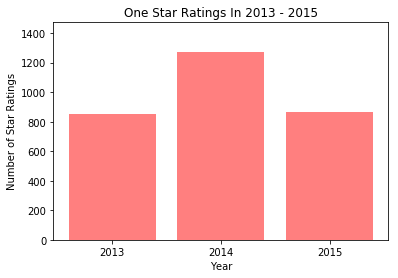

<Figure size 7200x3600 with 0 Axes>

In [89]:
users = star_rate1['star_rating']
x_axis = np.arange(len(users))
plt.ylim(0, max(users)+200)
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2013", "2014", "2015"])
plt.title("One Star Ratings In 2013 - 2015")
plt.xlabel("Year")
plt.ylabel("Number of Star Ratings")
plt.figure(figsize=(100,50))

Text(0,0.5,'Number of Star Ratings')

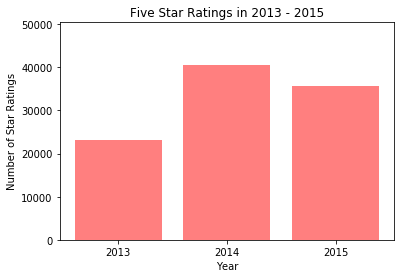

In [87]:
users = star_rate5['star_rating']
x_axis = np.arange(len(users))
plt.ylim(0, max(users)+10000)
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2013", "2014", "2015"])
plt.title("Five Star Ratings in 2013 - 2015")
plt.xlabel("Year")
plt.ylabel("Number of Star Ratings")